In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data\\train.csv")

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
echange = 0.011
def prix_euro(price):
    return price * 100000 * echange

In [7]:
data["prix_euro"] = data["Price"].map(prix_euro)

In [8]:
data.drop("Price", axis=1, inplace=True)

In [9]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,prix_euro
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1925.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13750.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4950.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6600.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,19514.0


In [10]:
data[["marque", "modele"]] = data["Name"].str.split(' ', n=1, expand=True)
data.drop("Name", axis=1, inplace=True)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,prix_euro,marque,modele
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1925.0,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13750.0,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4950.0,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6600.0,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,19514.0,Audi,A4 New 2.0 TDI Multitronic


In [11]:
data.describe()

,Year,Kilometers_Driven,Seats,prix_euro
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,10427.415185
std,3.269742,9.126884e+04,0.808840,12306.708824
min,1998.000000,1.710000e+02,0.000000,484.000000
25%,2011.000000,3.400000e+04,5.000000,3850.000000
50%,2014.000000,5.300000e+04,5.000000,6204.000000
75%,2016.000000,7.300000e+04,5.000000,10945.000000
max,2019.000000,6.500000e+06,10.000000,176000.000000


<Axes: xlabel='prix_euro', ylabel='Count'>

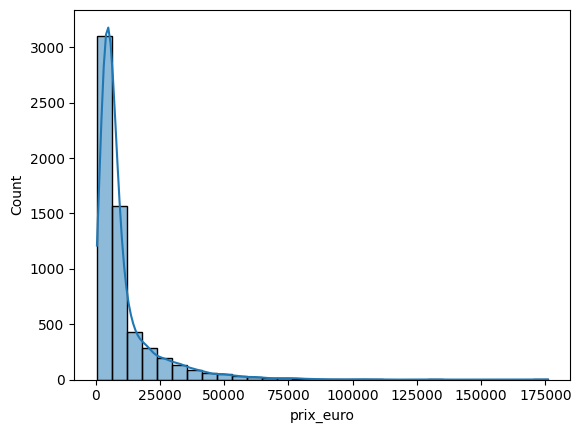

In [12]:
sns.histplot(data["prix_euro"], bins=30, kde=True)

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

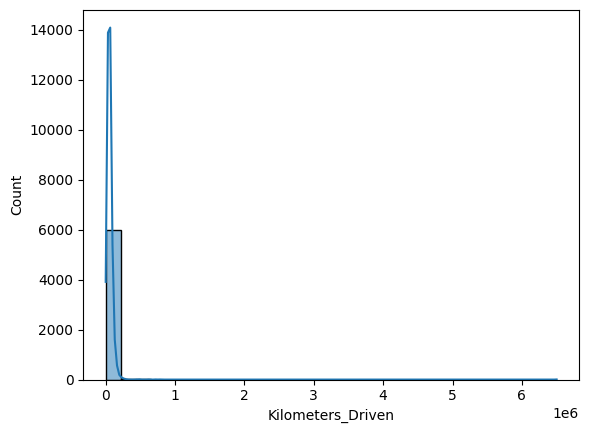

In [13]:
sns.histplot(data["Kilometers_Driven"], bins=30, kde=True)

<Axes: xlabel='Seats', ylabel='Count'>

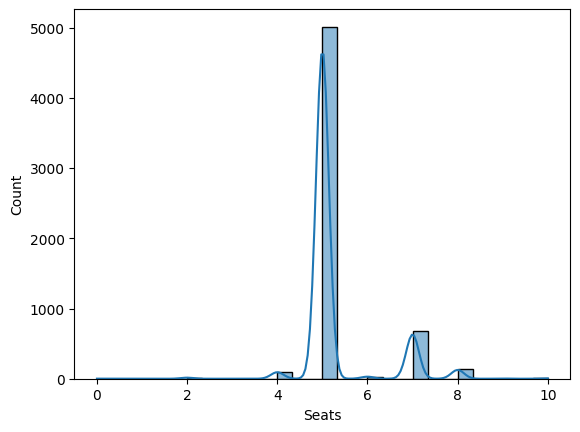

In [14]:
sns.histplot(data["Seats"], bins=30, kde=True)

<Axes: xlabel='Year', ylabel='Count'>

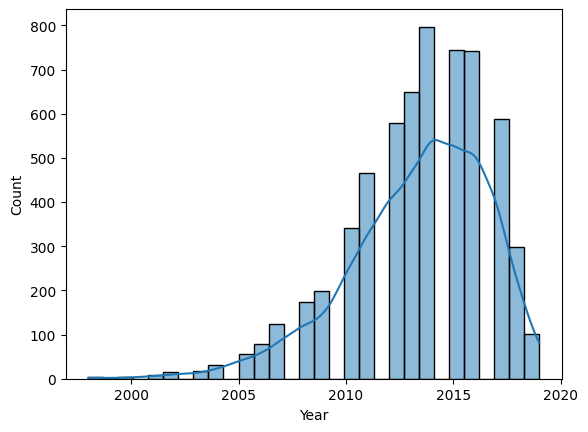

In [15]:
sns.histplot(data["Year"], bins=30, kde=True)

Text(0, 0.5, 'le prix en euro')

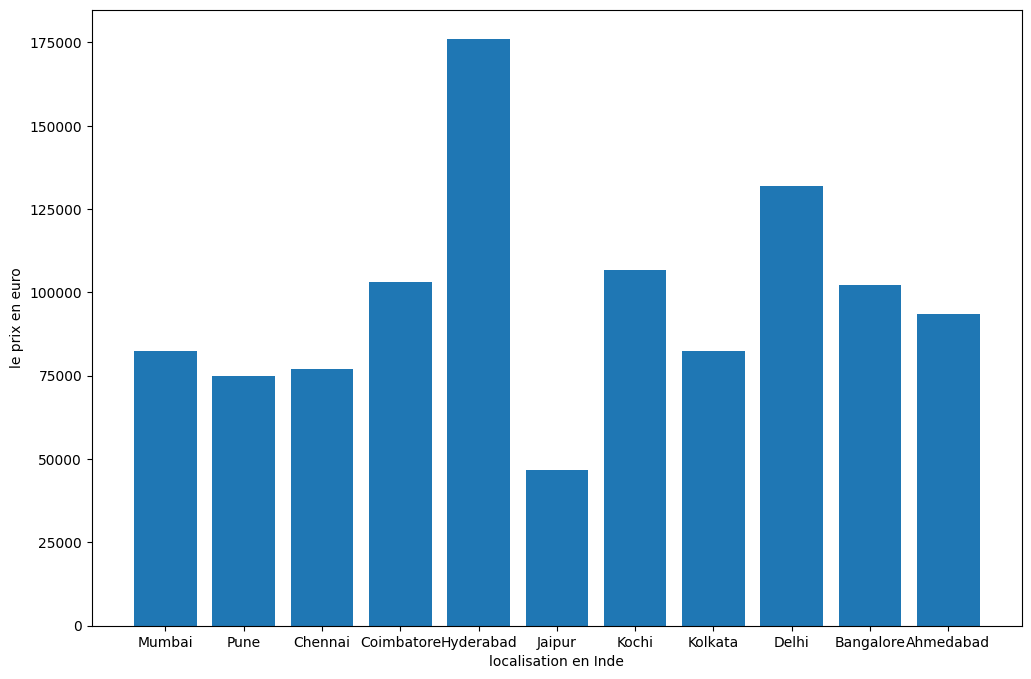

In [16]:
# prix par rapport Location
plt.figure(figsize=(12,8))
plt.bar(data["Location"], height=data["prix_euro"])
plt.xlabel("localisation en Inde")
plt.ylabel("le prix en euro")

Text(0, 0.5, 'le prix en euro')

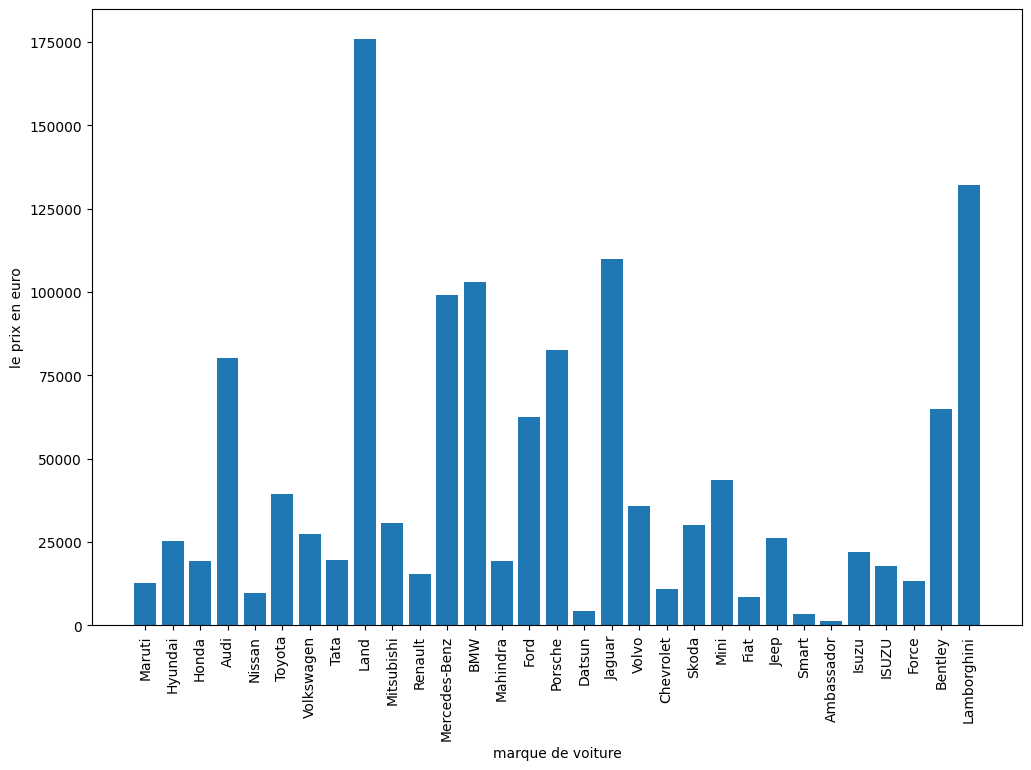

In [17]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["marque"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("marque de voiture")
plt.ylabel("le prix en euro")

Text(0, 0.5, 'le prix en euro')

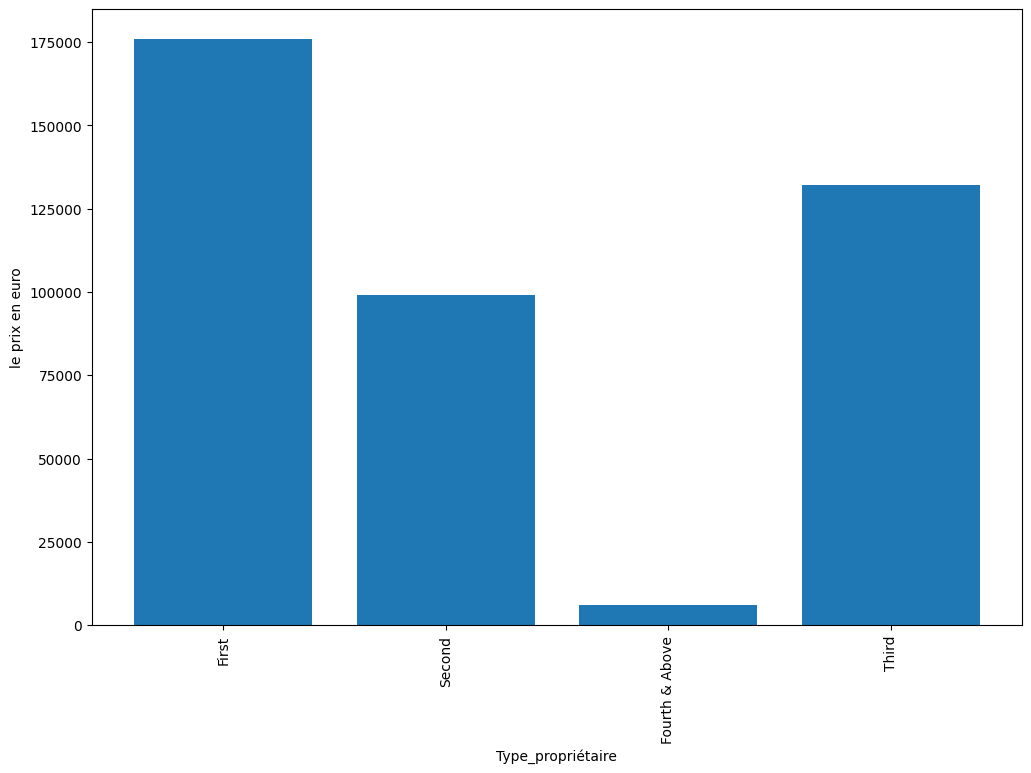

In [18]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["Owner_Type"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("Type_propriétaire")
plt.ylabel("le prix en euro")

il y a Automatic => 1720 / Manual => 4299, mais 

Text(0, 0.5, 'le prix en euro')

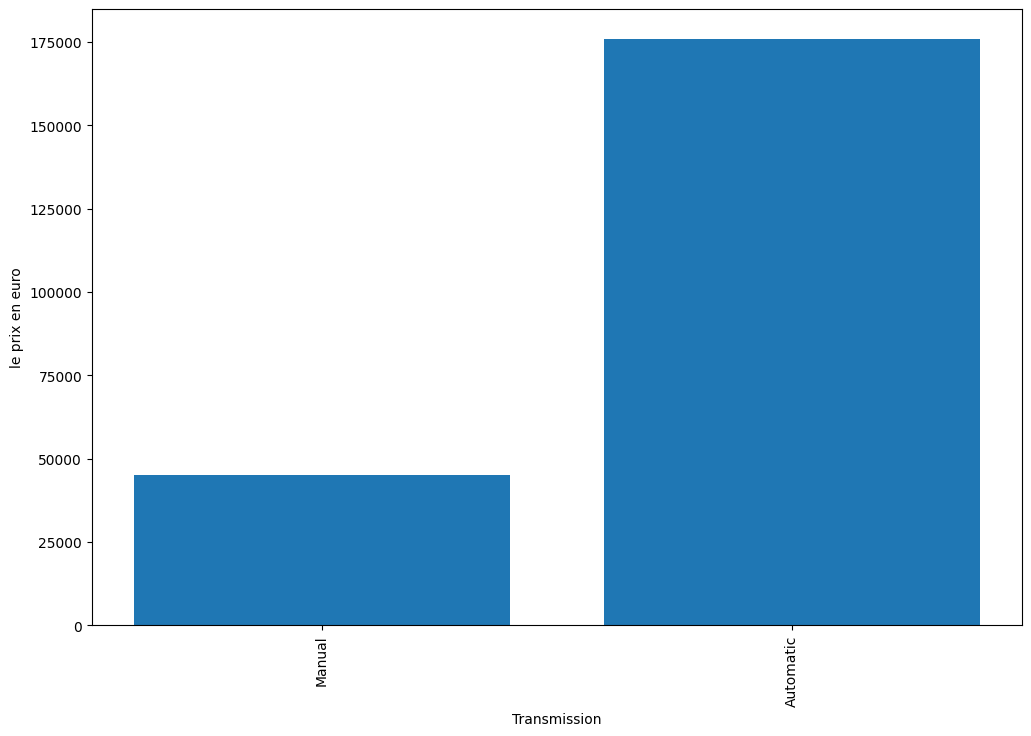

In [19]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["Transmission"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("Transmission")
plt.ylabel("le prix en euro")

# verifier si il y a beacoups de modeles ou pas 

In [19]:
np.count_nonzero(data["modele"].unique())

1876

In [20]:
modele_unique = []
for i in range(data["modele"].shape[0]):  
    a = data["modele"].str.split(" ")[i][0]
    modele_unique.append(a)

In [21]:
data["modele_unique"] = modele_unique

In [22]:
np.count_nonzero(data["modele_unique"].unique())

212

et j'ai reduit de 1876 unique à 212 unique dans la colonne unique

In [23]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,prix_euro,marque,modele,modele_unique
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1925.0,Maruti,Wagon R LXI CNG,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13750.0,Hyundai,Creta 1.6 CRDi SX Option,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4950.0,Honda,Jazz V,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6600.0,Maruti,Ertiga VDI,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,19514.0,Audi,A4 New 2.0 TDI Multitronic,A4


In [25]:
data.drop("modele", axis=1, inplace=True)

In [24]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,prix_euro,marque,modele,modele_unique
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1925.0,Maruti,Wagon R LXI CNG,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13750.0,Hyundai,Creta 1.6 CRDi SX Option,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4950.0,Honda,Jazz V,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6600.0,Maruti,Ertiga VDI,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,19514.0,Audi,A4 New 2.0 TDI Multitronic,A4


In [25]:
data['Engine'] = data['Engine'].str.replace("CC", "").astype(float, errors='ignore')
data['Power'] = pd.to_numeric(data['Power'].str.replace("bhp", ""), errors="coerce")
data["Mileage"] = data["Mileage"].str.replace("km/kg", "")
data["Mileage"] = data["Mileage"].str.replace("kmpl", "").astype(float, errors='ignore')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  New_Price          824 non-null    object 
 11  prix_euro          6019 non-null   float64
 12  marque             6019 non-null   object 
 13  modele             6019 non-null   object 
 14  modele_unique      6019 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 705.5+ KB


<Axes: title={'center': 'matrice correlation pour les nombres'}>

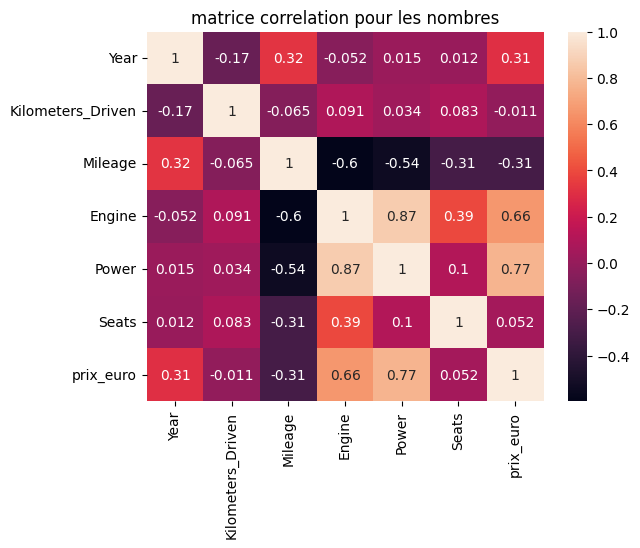

In [27]:
plt.title("matrice correlation pour les nombres")
sns.heatmap(data.select_dtypes(np.number).corr(), annot=True)

<Axes: title={'center': 'graphique pour les valeur NaN'}>

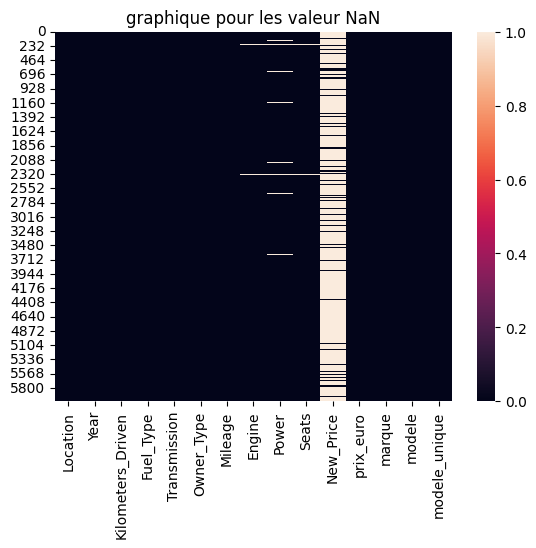

In [28]:
plt.title("graphique pour les valeur NaN")
sns.heatmap(data.isna())

encoder les categorique pour faire une matrice de corelation sur tout le data 

In [30]:
# supprimer la colonne "New_Price"
data.drop(["New_Price", "Location"], axis=1, inplace=True)

In [29]:
# supprimer les deux ligne de Fuel_Type = Electric parceque on a juste deux lignes
data.drop([4446,4904], axis=0, inplace=True)

In [31]:
# encoder les categorique
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
encoder_ordinal = OrdinalEncoder()
encoder_onehot = OneHotEncoder(sparse_output=False)

In [32]:
data["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [33]:
colonne_categorique_ordinal = data[["marque", "modele_unique","modele","Owner_Type"]] # selectionner les colonne categorique avec ordinal
colonne_categorique_ordinal.head()

,marque,modele_unique,modele,Owner_Type
0,Maruti,Wagon,Wagon R LXI CNG,First
1,Hyundai,Creta,Creta 1.6 CRDi SX Option,First
2,Honda,Jazz,Jazz V,First
3,Maruti,Ertiga,Ertiga VDI,First
4,Audi,A4,A4 New 2.0 TDI Multitronic,Second


In [34]:
colonne_categorique_onehot = data[["Fuel_Type","Transmission"]] # selectionner les colonne categorique avec onehot
colonne_categorique_onehot.head()

,Fuel_Type,Transmission
0,CNG,Manual
1,Diesel,Manual
2,Petrol,Manual
3,Diesel,Manual
4,Diesel,Automatic


In [35]:
colonne_numerique = data.select_dtypes(np.number)
colonne_numerique.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,prix_euro
0,2010,72000,26.60,998.0,58.16,5.0,1925.0
1,2015,41000,19.67,1582.0,126.20,5.0,13750.0
2,2011,46000,18.20,1199.0,88.70,5.0,4950.0
3,2012,87000,20.77,1248.0,88.76,7.0,6600.0
4,2013,40670,15.20,1968.0,140.80,5.0,19514.0


In [36]:
colonne_categorique_encoder_ordinal = encoder_ordinal.fit_transform(colonne_categorique_ordinal)

In [37]:
colonne_categorique_encoder_onehot = encoder_onehot.fit_transform(colonne_categorique_onehot)
encoder_onehot.get_feature_names_out(["Fuel_Type","Transmission"])

array(['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual'], dtype=object)

In [38]:
colonne_categorique_ordinal_df = pd.DataFrame(colonne_categorique_encoder_ordinal, columns=colonne_categorique_ordinal.columns)
colonne_categorique_ordinal_df.head()

,marque,modele_unique,modele,Owner_Type
0,18.0,187.0,1641.0,0.0
1,10.0,53.0,460.0,0.0
2,9.0,98.0,910.0,0.0
3,18.0,68.0,619.0,0.0
4,1.0,10.0,96.0,2.0


In [40]:
colonne_categorique_onehot_df = pd.DataFrame(colonne_categorique_encoder_onehot, columns=encoder_onehot.get_feature_names_out(["Fuel_Type","Transmission"]))
colonne_categorique_onehot_df.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
new_data = pd.concat([colonne_categorique_ordinal_df, colonne_categorique_onehot_df, colonne_numerique], axis=1)
new_data.head()

,marque,modele_unique,modele,Owner_Type,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,prix_euro
0,18.0,187.0,1641.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2010.0,72000.0,26.60,998.0,58.16,5.0,1925.0
1,10.0,53.0,460.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2015.0,41000.0,19.67,1582.0,126.20,5.0,13750.0
2,9.0,98.0,910.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2011.0,46000.0,18.20,1199.0,88.70,5.0,4950.0
3,18.0,68.0,619.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2012.0,87000.0,20.77,1248.0,88.76,7.0,6600.0
4,1.0,10.0,96.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2013.0,40670.0,15.20,1968.0,140.80,5.0,19514.0


<Axes: title={'center': 'nouvelle matrice corelation de data'}>

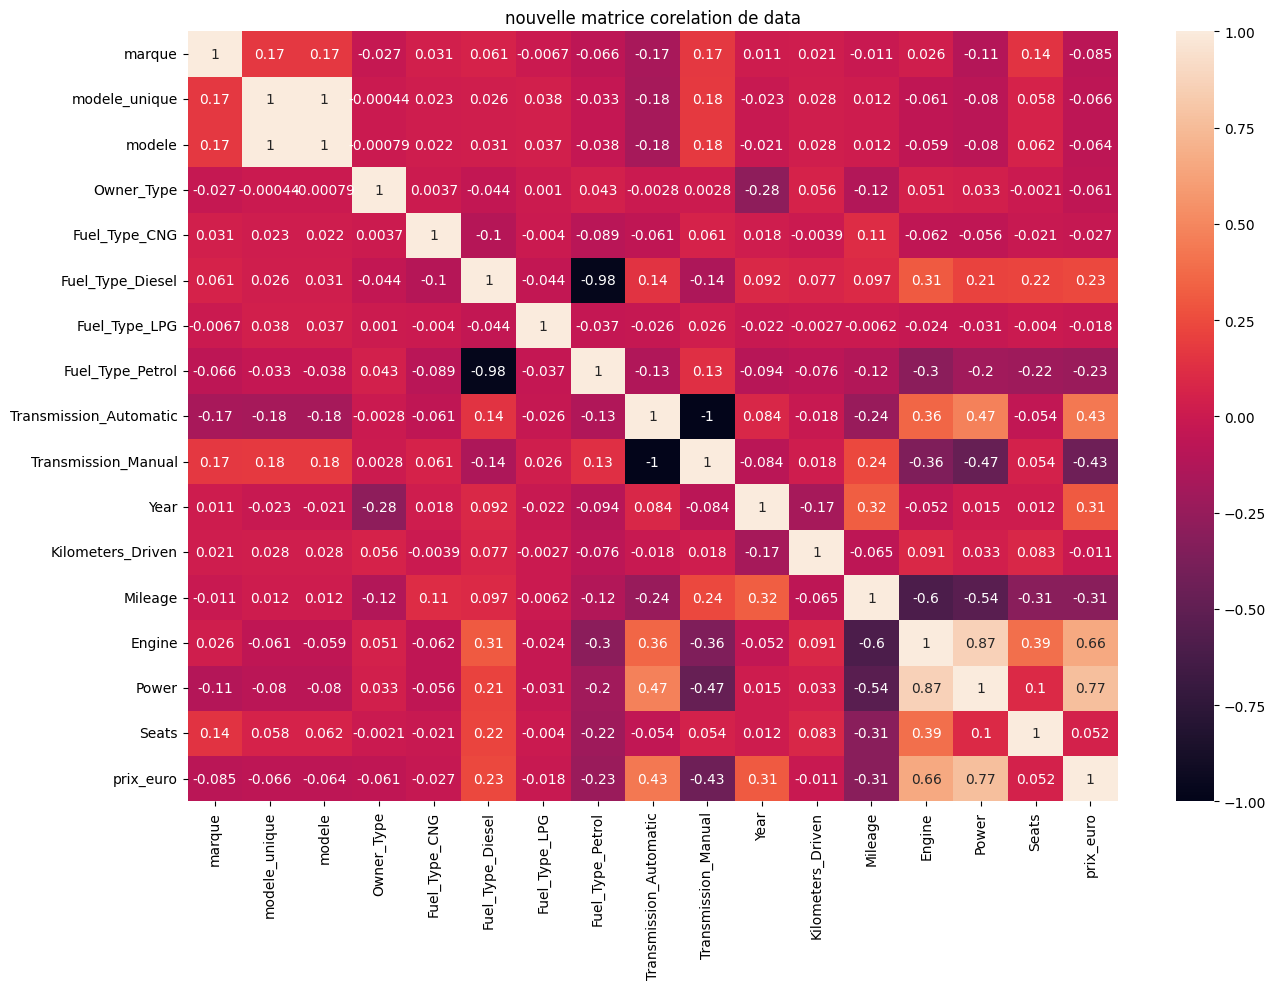

In [42]:
plt.figure(figsize=(15,10))
plt.title("nouvelle matrice corelation de data")
sns.heatmap(new_data.corr(), annot=True)

<Axes: title={'center': 'matrice corelation de data'}>

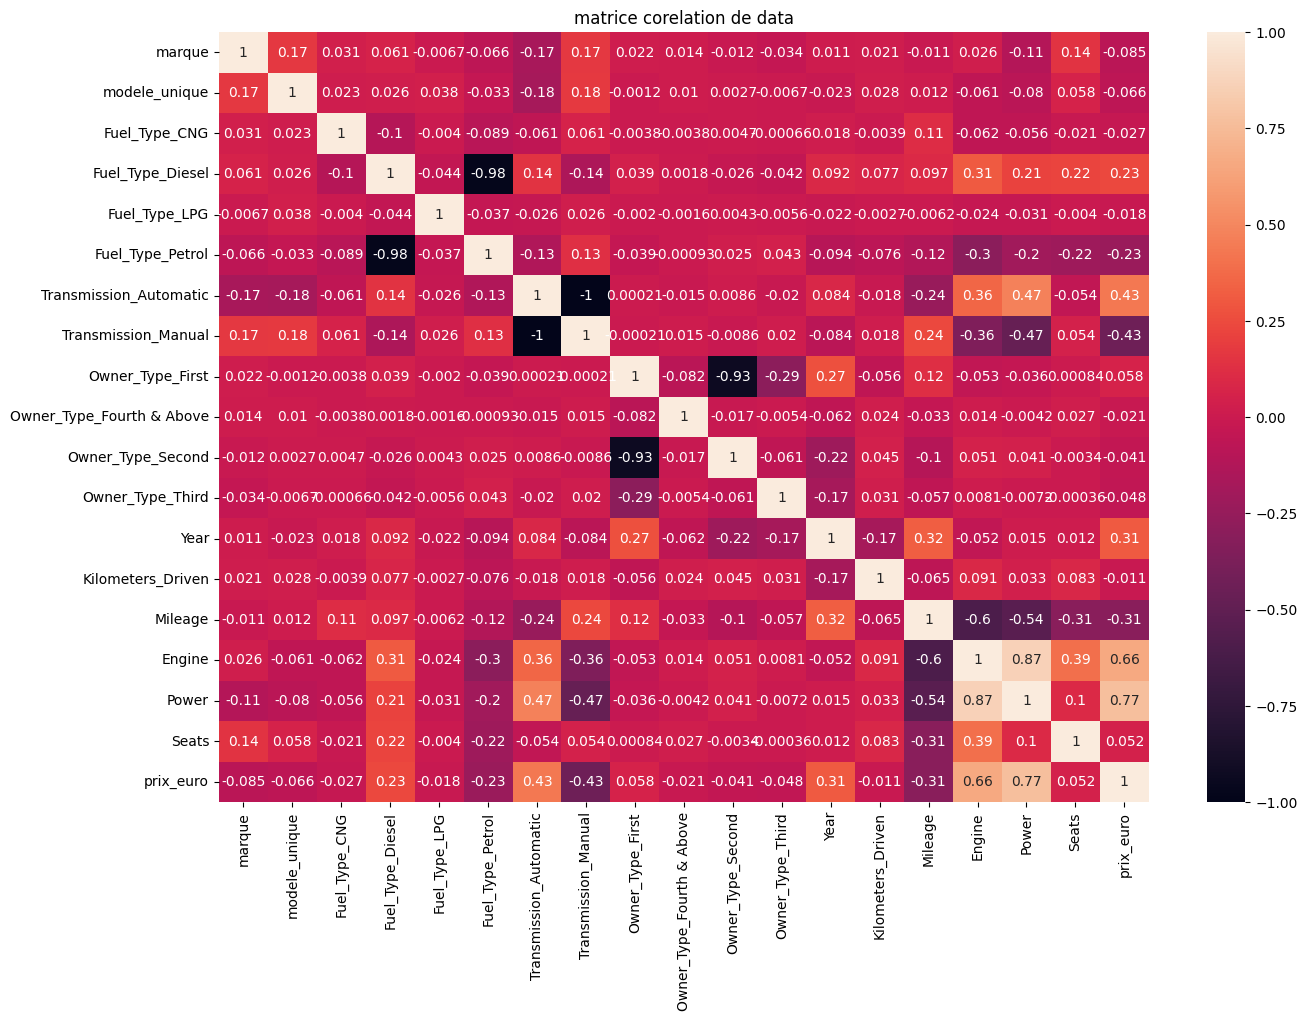

In [ ]:
plt.figure(figsize=(15,10))
plt.title("matrice corelation de data")
sns.heatmap(new_data.corr(), annot=True)

# sans OrdinalEncoder

In [44]:
new_data_sans_ordinal = pd.concat([colonne_categorique_onehot_df, colonne_numerique], axis=1)
new_data_sans_ordinal.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,prix_euro
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2010.0,72000.0,26.60,998.0,58.16,5.0,1925.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2015.0,41000.0,19.67,1582.0,126.20,5.0,13750.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2011.0,46000.0,18.20,1199.0,88.70,5.0,4950.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2012.0,87000.0,20.77,1248.0,88.76,7.0,6600.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2013.0,40670.0,15.20,1968.0,140.80,5.0,19514.0


<Axes: title={'center': 'matrice corelation de data sans ordinal'}>

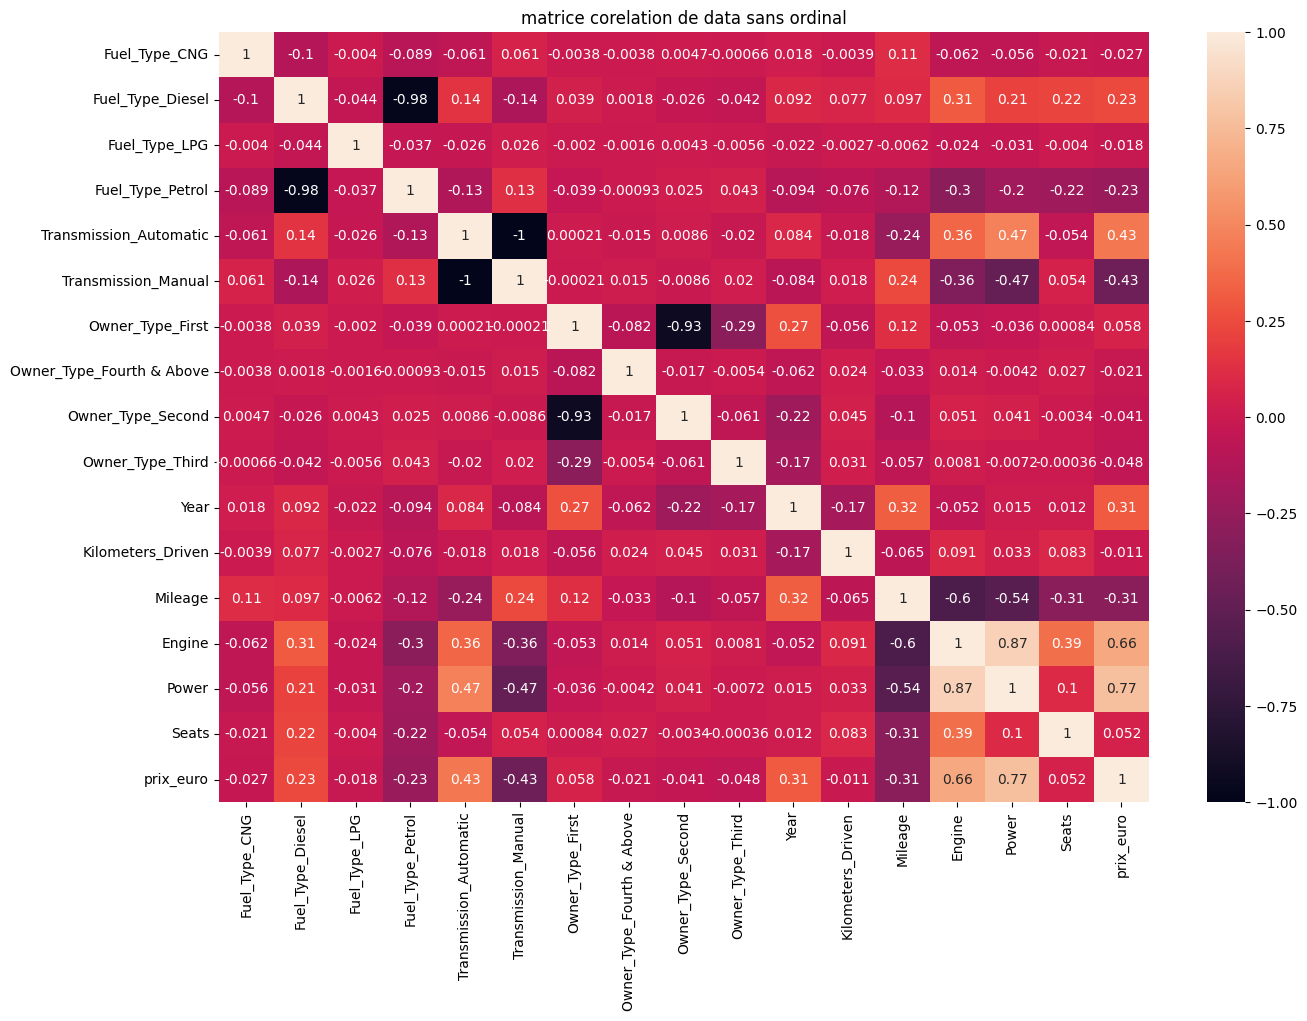

In [45]:
plt.figure(figsize=(15,10))
plt.title("matrice corelation de data sans ordinal")
sns.heatmap(new_data_sans_ordinal.corr(), annot=True)

# avec targetencoding ou d'autre encoder pour les colonne "modele" et "marque"

In [ ]:
data["marque"].value_counts()[10]